In [ ]:
!pip install -U scikit-learn

import sklearn
sklearn.show_versions()

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)

System:
    python: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 19.3.1
   setuptools: 50.3.0
      sklearn: 0.23.2
        numpy: 1.18.5
        scipy: 1.4.1
       Cython: 0.29.21
       pandas: 1.1.2
   matplotlib: 3.2.2
       joblib: 0.16.0
threadpoolctl: 2.1.0

Built with OpenMP: True


In [ ]:
data_train = pd.read_csv('contest_train_binary.csv')
X_test1 = pd.read_csv('contest_test.csv')


In [ ]:
data_train.count().sort_values()

FEATURE_189      325
FEATURE_194     7276
FEATURE_190     7329
FEATURE_191     9212
FEATURE_192    11461
               ...  
FEATURE_89     24521
FEATURE_90     24521
FEATURE_91     24521
FEATURE_60     24521
FEATURE_259    24521
Length: 262, dtype: int64

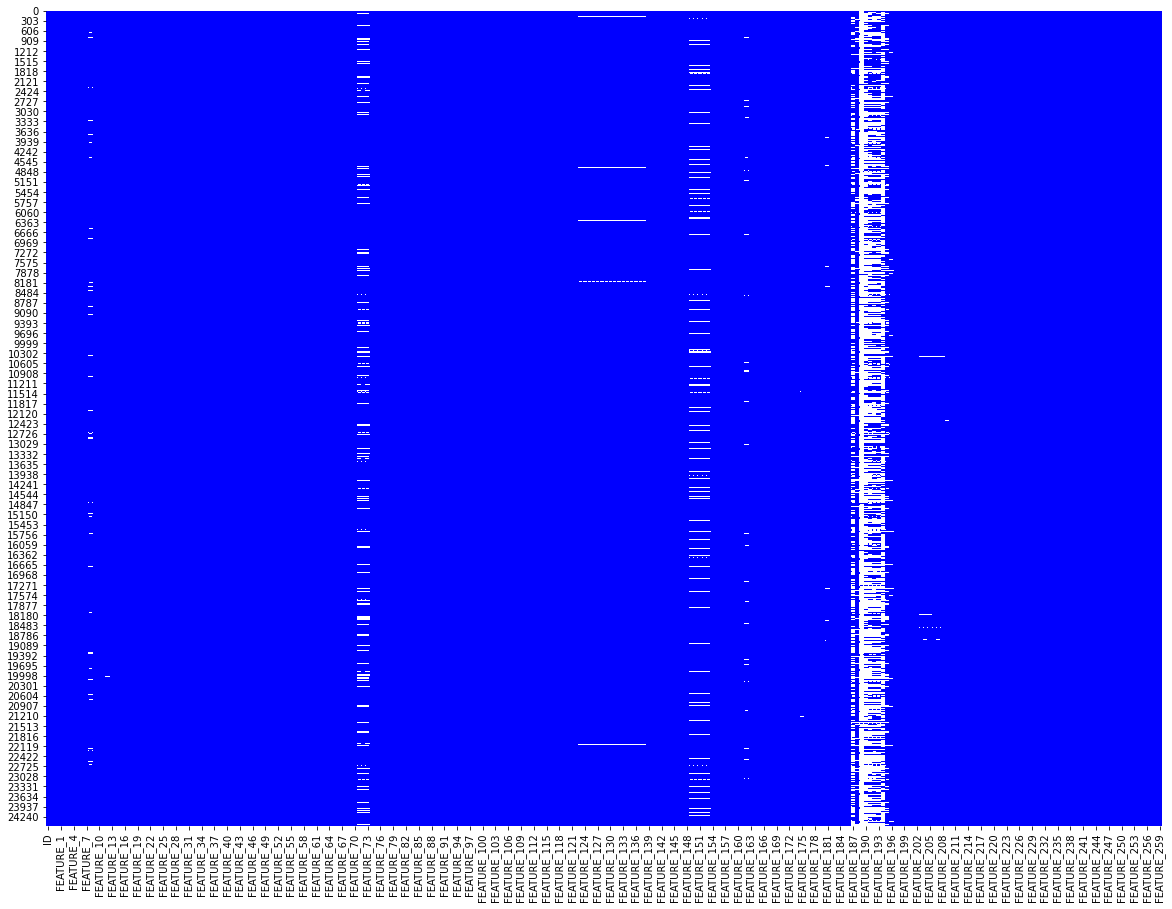

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,15))
cols = data_train.columns 
colours = ['b', 'w'] 
sns.heatmap(data_train[cols].isnull(), cbar=False, cmap=sns.color_palette(colours))

In [ ]:
data_train.describe()

,ID,TARGET,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
count,2.452100e+04,24521.000000,24521.000000,24521.000000,24521.000000,24521.0,24521.000000,24521.000000,24521.000000,24521.000000,23377.000000,24521.000000,24521.000000,24521.000000,24501.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,...,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.0,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.0,24521.000000,24521.00000,24521.000000
mean,1.393464e+09,0.230415,5.438196,1.337833,0.056401,0.0,0.141226,0.000163,0.011378,80.762084,278.787390,0.383304,0.244321,0.202439,259.315808,5.335264,2.194486,0.127075,0.121080,0.130419,0.117491,0.125688,-0.053130,5.986877,-0.339570,2.459304,5.114351,1.894001,3.330686,0.374169,1.717059,0.344970,0.303984,0.176339,0.197708,547.697324,655.439839,720.528579,867.445947,960.956128,...,1.307899,78.986501,132.575466,918.825560,1.633090,523.708173,22.018556,166.940582,189.003881,0.226010,979.363060,16.882468,1503.883963,2483.766249,6.976388,301.068279,302.083341,603.142110,102.743526,108.590881,386.421288,10.652176,7.369031,18.593614,214.917001,10.651482,3.063170,7.372619,12.047959,0.0,41.057379,36.403205,307.827071,408.052350,0.611965,0.640390,0.0,1.138575,1.18580,1.184699
std,1.981725e+09,0.421107,14.533334,1.826413,0.230698,0.0,0.348262,0.012771,0.106061,256.605853,1206.454609,0.867586,0.541028,0.401826,489.081719,18.819880,2.297629,0.333063,0.326227,0.336771,0.322011,0.331504,6.168228,42.801349,29.738937,50.978918,48.195614,35.907955,30.539871,17.068593,87.543676,13.201366,13.567985,10.471338,15.365657,2631.609941,3059.531480,3125.449570,3715.358860,3884.956835,...,0.523718,100.108775,151.419706,2494.913246,14.686731,515.331551,52.639633,144.654958,181.523411,8.244701,3718.793862,175.783619,4400.496958,6309.865602,63.766274,338.649639,302.479752,574.526151,163.113524,132.808946,325.127138,62.031526,40.549956,67.649644,239.790528,62.031550,26.602087,47.017224,34.038422,0.0,105.000146,105.872566,259.669681,349.968987,0.487312,0.479896,0.0,0.373638,0.40809,0.401288
min,1.428335e+07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-171.709797,-297.065679,0.000000,0.000000,0.000000,-311.402288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-117.669869,-100.000000,-123.305025,-122.617340,0.000000,-111.802447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-373.307474,-320.569978,-310.390755,-411.320897,-363.086985,...,1.000000,0.000000,0.000000,-338.858445,-15.000000,-236.585840,0.000

In [ ]:
cols_to_drop = []
for col in data_train.columns:
    pct_missing = np.mean(data_train[col].isnull())

    if pct_missing > 0.6:
      cols_to_drop = np.append(cols_to_drop, col)

cols_to_drop

array(['FEATURE_189', 'FEATURE_190', 'FEATURE_191', 'FEATURE_194'],
      dtype='<U32')

In [ ]:
data_train = data_train.drop(cols_to_drop, axis = 1)
X_test1 = X_test1.drop(cols_to_drop, axis = 1)

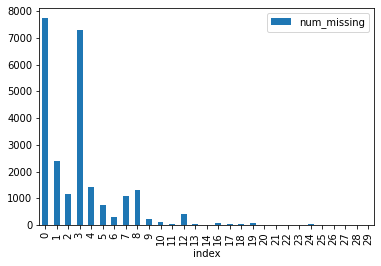

In [ ]:
for col in data_train.columns:
    missing = data_train[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        data_train['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in data_train.columns if 'ismissing' in col]
data_train['num_missing'] = data_train[ismissing_cols].sum(axis=1)
data_train['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index')

In [ ]:
ind_missing = data_train[data_train['num_missing'] > 6].index
data_train = data_train.drop(ind_missing, axis=0)
X_test1.describe()

,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_20,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_27,FEATURE_28,FEATURE_29,FEATURE_30,FEATURE_31,FEATURE_32,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,...,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_229,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_249,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_256,FEATURE_257,FEATURE_258,FEATURE_259
count,9.484000e+03,9484.000000,9484.000000,9484.000000,9484.0,9484.000000,9484.0,9484.000000,9484.000000,8827.000000,9484.000000,9484.000000,9484.000000,9473.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.00000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,...,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9448.000000,9448.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.0,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9484.000000,9211.000000,9484.000000,9484.000000,9484.000000
mean,1.827995e+09,7.155103,1.579924,0.076972,0.0,0.169443,0.0,0.011071,105.738790,333.044762,0.495150,0.308941,0.268241,310.532531,7.065795,2.642345,0.155841,0.157107,0.161324,0.160903,0.149726,0.018463,5.375282,-0.489962,2.792494,5.528564,1.456991,-4.911838,0.61841,1.452130,0.407107,0.468579,0.409743,0.674294,882.102398,1008.363296,1204.638393,1388.521854,1619.274713,1672.666339,...,1.320013,89.163539,148.440848,1461.659303,1.709511,571.402767,26.902151,190.231126,217.197075,0.517292,1562.028492,20.283741,2262.578589,3824.445291,8.220266,310.147842,301.256229,611.079589,107.702794,108.733171,418.312405,12.037221,10.580768,24.267503,242.019094,12.045972,4.224483,9.453501,15.699916,0.0,44.314741,48.558836,322.459667,443.908054,0.687895,0.768558,0.213549,1.169443,1.171025,1.145614
std,2.419743e+09,25.429685,2.135957,0.266561,0.0,0.375163,0.0,0.104642,294.872399,1315.195426,0.993535,0.606896,0.443067,526.061643,21.284079,2.493286,0.362724,0.363921,0.367849,0.367460,0.356821,9.831888,46.808473,33.642847,58.394691,54.613290,18.214372,33.024268,18.11399,62.605882,12.906869,17.657006,17.915404,26.916862,3472.884972,3651.295240,4261.338575,4777.086522,5350.066121,5544.218297,...,0.531390,116.162654,173.407743,3261.824293,11.391033,549.878443,56.132830,152.695828,192.129804,12.842774,4845.980259,173.389454,5653.504485,8012.423099,69.080249,343.509378,299.183947,582.427289,159.322007,131.547537,340.379591,65.080257,51.915234,79.579390,248.036982,65.091935,34.618600,60.155851,41.201462,0.0,110.391616,130.549839,267.850641,368.954749,0.463377,0.421777,0.409834,0.409822,0.398854,0.366806
min,1.429078e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-168.254348,-296.298635,0.000000,0.000000,0.000000,-252.915768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-116.979737,-100.000000,-123.149348,-119.285312,0.000000,-106.592477,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-269.524162,-262.700812,-277.271488,-322.593571,-334.189971,-408.604466,...,1.000000,0.000000,0.000000,-277.976935,-56.000000,-260.726488,0.000000,0.000000,-51.330279,0.000000,-298.076283,0.000000,-307.8896

In [ ]:
for col in data_train.columns:
  if 'missing' in col:
    data_train = data_train.drop(col, axis = 1)

data_train.columns

Index(['ID', 'TARGET', 'FEATURE_0', 'FEATURE_1', 'FEATURE_2', 'FEATURE_3',
       'FEATURE_4', 'FEATURE_5', 'FEATURE_6', 'FEATURE_7',
       ...
       'FEATURE_250', 'FEATURE_251', 'FEATURE_252', 'FEATURE_253',
       'FEATURE_254', 'FEATURE_255', 'FEATURE_256', 'FEATURE_257',
       'FEATURE_258', 'FEATURE_259'],
      dtype='object', length=258)

In [ ]:
for col in data_train.columns:
  mean_val = data_train[col].median()
  data_train[col].fillna( mean_val, inplace=True )
  

In [ ]:
for col in X_test1.columns:
  mean_val = X_test1[col].median()
  X_test1[col].fillna( mean_val, inplace=True )

In [ ]:
data_train.count().sort_values()

ID             21055
FEATURE_161    21055
FEATURE_162    21055
FEATURE_163    21055
FEATURE_164    21055
               ...  
FEATURE_90     21055
FEATURE_91     21055
FEATURE_92     21055
FEATURE_62     21055
FEATURE_259    21055
Length: 258, dtype: int64

In [ ]:
X_test1.count().sort_values()

ID             9484
FEATURE_161    9484
FEATURE_162    9484
FEATURE_163    9484
FEATURE_164    9484
               ... 
FEATURE_90     9484
FEATURE_91     9484
FEATURE_92     9484
FEATURE_126    9484
FEATURE_259    9484
Length: 257, dtype: int64

In [ ]:
num_rows = len(data_train.index)
low_information_cols = [] #
for col in data_train.columns:
    cnts = data_train[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.97:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        #print(cnts)
        #print()

#print(low_information_cols)

FEATURE_3: 100.00000%
FEATURE_5: 99.98100%
FEATURE_6: 98.74614%
FEATURE_20: 99.73403%
FEATURE_27: 99.80052%
FEATURE_28: 99.80527%
FEATURE_29: 99.81477%
FEATURE_30: 99.84802%
FEATURE_31: 99.89551%
FEATURE_32: 99.91451%
FEATURE_75: 100.00000%
FEATURE_139: 99.46331%
FEATURE_140: 99.45381%
FEATURE_141: 99.45381%
FEATURE_144: 100.00000%
FEATURE_145: 97.26906%
FEATURE_146: 98.27119%
FEATURE_156: 98.77464%
FEATURE_157: 97.78675%
FEATURE_159: 99.98575%
FEATURE_229: 99.73403%
FEATURE_249: 100.00000%
FEATURE_256: 100.00000%


In [ ]:
data_train = data_train.drop(low_information_cols, axis = 1)
X_test1 = X_test1.drop(low_information_cols, axis = 1)

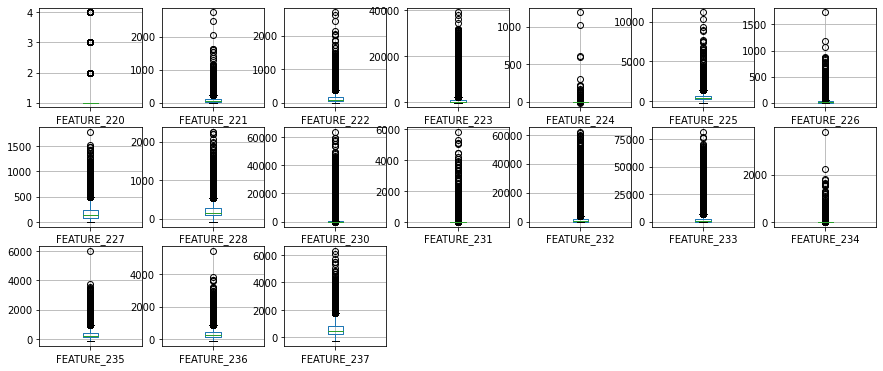

In [ ]:
plt.figure(figsize=(15,15))
i=1
for col in data_train.columns[198 : 215]:
  plt.subplot(7,7,i)
  fig = data_train.boxplot(column=col)
  i+=1


In [ ]:
data_train = data_train[data_train['FEATURE_0'] < 200]
data_train = data_train[data_train['FEATURE_1'] < 20]
data_train = data_train[data_train['FEATURE_12'] < 5000]
data_train = data_train[data_train['FEATURE_13'] < 500]
data_train = data_train[data_train['FEATURE_26'] < 200]
data_train = data_train[data_train['FEATURE_45'] < 60000]
data_train = data_train[data_train['FEATURE_53'] < 80000]
data_train = data_train[data_train['FEATURE_57'] < 5000]
data_train = data_train[data_train['FEATURE_61'] < 4100]
data_train = data_train[data_train['FEATURE_62'] < 500]
data_train = data_train[data_train['FEATURE_63'] < 7000]

data_train = data_train[data_train['FEATURE_68'] < 7000]
data_train = data_train[data_train['FEATURE_74'] < 75]
data_train = data_train[data_train['FEATURE_76'] < 40]
data_train = data_train[data_train['FEATURE_78'] < 30000]
data_train = data_train[data_train['FEATURE_80'] < 750]
data_train = data_train[data_train['FEATURE_81'] < 250]
data_train = data_train[data_train['FEATURE_83'] < 1600]
data_train = data_train[data_train['FEATURE_84'] < 4200]
data_train = data_train[data_train['FEATURE_93'] < 15000]
data_train = data_train[data_train['FEATURE_95'] < 20]
data_train = data_train[data_train['FEATURE_96'] < 40]
data_train = data_train[data_train['FEATURE_98'] < 75]
data_train = data_train[data_train['FEATURE_99'] < 30]
data_train = data_train[data_train['FEATURE_100'] < 200]
data_train = data_train[data_train['FEATURE_101'] < 400]
data_train = data_train[data_train['FEATURE_103'] < 1500]
data_train = data_train[data_train['FEATURE_105'] < 20]
data_train = data_train[data_train['FEATURE_106'] < 30]
data_train = data_train[data_train['FEATURE_109'] < 25]
data_train = data_train[data_train['FEATURE_110'] < 50]
data_train = data_train[data_train['FEATURE_111'] < 80]
data_train = data_train[data_train['FEATURE_112'] < 400]
data_train = data_train[data_train['FEATURE_113'] < 900]
data_train = data_train[data_train['FEATURE_114'] < 120]
data_train = data_train[data_train['FEATURE_115'] < 150]
data_train = data_train[data_train['FEATURE_116'] < 250]
data_train = data_train[data_train['FEATURE_117'] < 100]

data_train = data_train[data_train['FEATURE_118'] < 180]
data_train = data_train[data_train['FEATURE_119'] < 160]
data_train = data_train[data_train['FEATURE_121'] < 250]
data_train = data_train[data_train['FEATURE_122'] < 600]
data_train = data_train[data_train['FEATURE_124'] < 500]
data_train = data_train[data_train['FEATURE_125'] < 300]
data_train = data_train[data_train['FEATURE_126'] < 300]
data_train = data_train[data_train['FEATURE_128'] < 1900]
data_train = data_train[data_train['FEATURE_129'] < 1300]
data_train = data_train[data_train['FEATURE_132'] < 510]
data_train = data_train[data_train['FEATURE_133'] < 400]
data_train = data_train[data_train['FEATURE_134'] < 440]
data_train = data_train[data_train['FEATURE_136'] < 400]
data_train = data_train[data_train['FEATURE_137'] < 3000]
data_train = data_train[data_train['FEATURE_138'] < 3800]
data_train = data_train[data_train['FEATURE_142'] < 400]
data_train = data_train[data_train['FEATURE_143'] < 500]
data_train = data_train[data_train['FEATURE_149'] < 200]
data_train = data_train[data_train['FEATURE_150'] < 100]
data_train = data_train[data_train['FEATURE_153'] < 100]
data_train = data_train[data_train['FEATURE_160'] < 20000]
data_train = data_train[data_train['FEATURE_161'] < 1000]
data_train = data_train[data_train['FEATURE_165'] < 40]
data_train = data_train[data_train['FEATURE_166'] < 200]
data_train = data_train[data_train['FEATURE_167'] < 120]
data_train = data_train[data_train['FEATURE_168'] < 1000]
data_train = data_train[data_train['FEATURE_173'] < 1000]
data_train = data_train[data_train['FEATURE_175'] < 200]
data_train = data_train[data_train['FEATURE_177'] < 1300]

data_train = data_train[data_train['FEATURE_185'] < 1000]
data_train = data_train[data_train['FEATURE_198'] < 100]
data_train = data_train[data_train['FEATURE_215'] < 1700]
data_train = data_train[data_train['FEATURE_216'] < 2000]
data_train = data_train[data_train['FEATURE_221'] < 1800]
data_train = data_train[data_train['FEATURE_222'] < 2000]
data_train = data_train[data_train['FEATURE_224'] < 500]
data_train = data_train[data_train['FEATURE_225'] < 80000]
data_train = data_train[data_train['FEATURE_226'] < 1000]
data_train = data_train[data_train['FEATURE_227'] < 1500]
data_train = data_train[data_train['FEATURE_234'] < 2000]
data_train = data_train[data_train['FEATURE_235'] < 4000]
data_train = data_train[data_train['FEATURE_236'] < 4000]
data_train = data_train[data_train['FEATURE_238'] < 3000]
data_train = data_train[data_train['FEATURE_239'] < 1300]

data_train = data_train[data_train['FEATURE_241'] < 1500]
data_train = data_train[data_train['FEATURE_243'] < 1000]
data_train = data_train[data_train['FEATURE_244'] > -200]
data_train = data_train[data_train['FEATURE_245'] < 1500]
data_train = data_train[data_train['FEATURE_247'] < 1300]
data_train = data_train[data_train['FEATURE_248'] < 750]
data_train = data_train[data_train['FEATURE_250'] > -100]
data_train = data_train[data_train['FEATURE_251'] < 2000]
data_train = data_train[data_train['FEATURE_252'] > -50]



In [ ]:
data_train = data_train.drop('ID', axis=1).drop_duplicates()

In [ ]:
#data_test = data_test.drop(['ID', 'TARGET'], axis = 1)

In [ ]:
filt_data = data_train.drop(['TARGET'], axis = 1) 
filt_data.describe()

,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_4,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,...,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_257,FEATURE_258,FEATURE_259
count,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,...,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000,10359.000000
mean,4.131673,1.176465,0.030505,0.122116,51.581415,231.004372,0.299836,0.191524,0.161792,202.254252,3.556424,1.909740,0.103871,0.100396,0.101844,0.100106,0.102713,5.090499,-0.279554,2.289478,4.625913,1.853490,3.191526,259.416340,305.395730,343.068995,405.000976,468.664703,551.585355,21.761753,20.488754,12.025678,11.163143,9.759436,11.919780,761.521492,827.486981,848.975314,909.891155,964.692578,...,694.736494,1.310551,1.345786,1.237571,47.818419,85.937928,559.280654,1.567815,342.627630,12.609711,122.997394,135.565542,474.797264,10.947292,958.975843,1435.335274,4.017666,144.026399,181.561006,326.134879,53.953857,68.303215,258.393228,5.746211,3.662226,13.245197,141.884421,5.746211,1.922000,5.933005,8.626315,23.549667,24.764166,210.943998,273.335262,0.633555,0.611256,1.136403,1.159282,1.128294
std,10.509259,1.654726,0.171980,0.327436,182.675596,1078.261875,0.758979,0.478745,0.368277,416.250489,10.050475,2.012142,0.305108,0.300542,0.302457,0.300156,0.303598,39.651395,24.197451,51.014546,49.024894,35.364912,32.526198,1734.453103,1961.364052,2013.358101,2316.979473,2531.308735,2756.611320,246.463614,241.569843,166.410997,176.438287,171.826280,216.836794,2673.862047,3211.423996,3219.334018,3362.658866,3590.169076,...,2057.840666,0.588553,0.611042,0.485783,51.425290,85.996162,1814.965203,5.494052,229.480393,31.075317,96.402360,117.114807,2360.603406,160.785968,3327.320116,4434.758034,43.526696,122.387059,175.043873,253.156824,74.206646,76.537592,159.502031,27.796553,24.108790,48.194929,156.174553,27.796553,16.568537,28.580938,21.161126,53.641106,68.406991,142.964304,178.729161,0.481856,0.487489,0.371855,0.384984,0.347459
min,0.000000,0.000000,0.000000,0.000000,-142.497595,-297.065679,0.000000,0.000000,0.000000,-307.805507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-117.669869,-100.000000,-123.305025,-119.572340,0.000000,-101.838741,-373.307474,-319.650659,-262.827991,-274.607070,-363.086985,-282.883403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-268.553406,-269.224584,-264.7

In [ ]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.eye(len(df_corr), dtype=bool)).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [ ]:
filt_data1 = trimm_correlated(filt_data, 0.95)
columns_dat = filt_data1.columns

In [ ]:
filt_data1.skew()

FEATURE_0      6.541418
FEATURE_1      2.382897
FEATURE_2      5.460929
FEATURE_4      2.308588
FEATURE_7      4.370963
                 ...   
FEATURE_254   -0.554444
FEATURE_255   -0.456533
FEATURE_257    2.697915
FEATURE_258    2.221258
FEATURE_259    2.536371
Length: 203, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
y = data_train['TARGET']
X = filt_data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#X_train.describe()


In [ ]:
col = X_train.columns
X_test1.drop(['ID'], axis = 1)
X_test1


,ID,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_4,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,...,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_257,FEATURE_258,FEATURE_259
0,1154270440,1.0,1.0,0.0,0.0,-46.950807,-45.018511,0.0,0.0,0.0,375.275910,3.0,3.0,0.0,0.0,0.0,0.0,0.0,6.426897,0.0,2.321265,-0.905753,0.0,-22.227774,-42.820859,1.147440,85.294977,-23.305163,-38.461023,9.575998,0.0,0.0,0.0,0.0,0.0,0.0,-4.510067,-20.719010,7.774870,15.178316,...,76.662892,1.0,1.0,1.0,97.0,178.0,38.761774,0.0,415.013802,2.0,73.0,73.719497,-34.979351,0.0,6.475137,37.029428,0.0,449.586266,177.513725,596.616992,8.0,19.0,97.923366,0.0,0.0,0.0,134.420299,0.0,0.0,0.0,2.0,0.0,0.0,190.587701,162.047775,1.0,0.0,1.0,1.0,1.0
1,1147987574,0.0,0.0,1.0,0.0,343.627489,4.220417,3.0,1.0,0.0,1151.528693,8.0,8.0,1.0,0.0,0.0,1.0,0.0,8.917973,0.0,-13.342206,-1.004079,0.0,-52.524159,612.402400,6078.981867,5783.608466,4778.632797,7561.819364,6912.769139,0.0,0.0,0.0,0.0,0.0,0.0,2352.570193,4574.032895,4976.168771,5704.951822,...,3179.015745,2.0,2.0,2.0,60.0,146.0,394.897910,4.0,594.207187,5.0,194.0,200.013875,6466.656536,0.0,4391.992065,10918.513351,0.0,59.051162,183.029528,178.579640,69.0,132.0,803.108634,0.0,56.0,53.0,550.695871,0.0,0.0,1.0,4.0,5.0,109.0,594.572663,685.500149,1.0,1.0,1.0,1.0,2.0
2,1129622364,0.0,0.0,0.0,1.0,909.178045,3260.445427,3.0,1.0,1.0,595.157344,4.0,4.0,0.0,0.0,0.0,0.0,0.0,-2.812688,197.6,7.128081,16.614916,3.9,-99.617480,-14.793107,-7.916831,-4.369740,-12.630467,26.080368,-21.525147,10.0,54.0,2.0,2.0,0.0,122.0,600.660923,545.085374,929.387237,1282.748925,...,284.312254,1.0,1.0,1.0,0.0,10.0,192.359888,0.0,468.262798,0.0,30.0,5.822393,5.600241,41.0,1088.634697,1049.875737,0.0,-21.714475,6.277072,-13.562710,0.0,0.0,284.931943,0.0,0.0,297.0,9.587041,0.0,0.0,0.0,0.0,0.0,297.0,10.214396,300.397949,0.0,0.0,1.0,1.0,1.0
3,619797496,6.0,2.0,0.0,0.0,-4.499021,-93.374738,0.0,0.0,0.0,528.690347,3.0,3.0,0.0,0.0,1.0,0.0,1.0,190.969267,0.0,99.214239,119.121181,0.0,-26.234061,31.710702,72.692389,-24.477284,-2.180190,-35.561752,1403.975917,0.0,0.0,0.0,0.0,0.0,0.0,104.289461,227.233405,455.010910,623.248140,...,1783.005396,2.0,2.0,1.0,23.0,96.0,2273.481932,1.0,360.666130,89.0,283.0,373.660742,524.750591,0.0,1728.081934,2231.478614,0.0,181.459589,157.576997,306.926086,66.0,69.0,341.282059,0.0,1.0,1.0,290.766252,0.0,0.0,0.0,5.0,1.0,2.0,334.873280,363.739214,1.0,1.0,2.0,2.0,1.0
4,7391484886,1.0,1.0,0.0,0.0,-23.189787,-35.810318,0.0,0.0,0.0,489.680650,8.0,4.0,0.0,0.0,0.0,1.0,0.0,16.432627,0.0,-50.246036,6.430894,0.0,-18.756357,4410.154122,6403.870008,4917.966502,4484.942893,4023.778627,5192.713651,0.0,0.0,0.0,0.0,0.0,0.0,649.067988,1839.060498,565.361329,410.937824,...,1307.347704,1.0,1.0,1.0,44.0,60.0,244.339443,2.0,871.177045,13.0,121.0,149.611858,4578.728127,0.0,652.937542,5212.791753,0.0,168.956544,52.770095,200.619774,132.0,21.0,603.986683,0.0,0.0,0.0,269.900387,0.0,110.0,25.0,2.0,83.0,136.0,551.413748,769.830050,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
X_test

,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_4,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,...,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_257,FEATURE_258,FEATURE_259
16988,14.0,2.0,0.0,0.0,0.575332,9.036381,0.0,0.0,0.0,700.624688,20.0,7.0,0.0,0.0,0.0,0.0,1.0,-2.738680,0.0,200.555633,197.405178,0.0,-4.103874,4.820212,27.675679,-56.350066,-80.129257,9.470451,-5.733324,0.0,0.0,0.0,0.0,0.0,0.0,-18.096211,0.495293,-16.213490,-32.091758,-12.401989,...,1925.752484,2.0,1.0,1.0,32.0,71.0,2689.687287,2.0,598.229934,0.0,53.0,48.437468,-3.686661,0.0,1657.810298,1604.574067,0.0,176.511770,195.116401,226.736024,21.0,31.0,209.335905,0.0,0.0,0.0,417.641957,0.0,0.0,0.0,0.0,58.0,0.0,424.811209,454.469110,1.0,1.0,2.0,1.0,1.0
11979,0.0,0.0,0.0,0.0,18.722033,-32.759713,0.0,0.0,0.0,1188.764395,4.0,3.0,0.0,0.0,0.0,0.0,0.0,-7.106837,0.0,1.231613,-2.778756,0.0,-1.707578,-0.534423,2.148440,-30.099832,-0.908281,12.717504,16.130472,0.0,0.0,0.0,0.0,0.0,0.0,117.678332,5.911989,-10.015445,4.616774,-14.793511,...,9.339636,1.0,1.0,1.0,29.0,95.0,-27.193795,0.0,128.489253,0.0,28.0,81.600000,-55.609026,0.0,13.015069,-36.915263,0.0,231.501886,243.383814,372.743633,30.0,50.0,121.391942,0.0,0.0,0.0,57.433664,0.0,0.0,0.0,0.0,0.0,0.0,39.655354,105.510208,1.0,0.0,1.0,1.0,1.0
8327,7.0,2.0,0.0,0.0,-54.207531,-17.760816,0.0,0.0,0.0,139.511850,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.049278,0.0,-1.870916,-1.041697,0.0,-2.959227,-11.241025,87.053414,-10.568899,-4.692401,66.298809,-31.492590,0.0,0.0,0.0,0.0,0.0,0.0,-14.860401,-5.137945,77.631176,-66.309229,-52.985590,...,6.860924,2.0,1.0,1.0,27.0,28.0,-21.743788,0.0,55.619841,1.0,46.0,55.478890,57.599270,0.0,63.879045,-38.290704,0.0,25.009461,36.574008,199.039977,8.0,12.0,55.833483,0.0,0.0,0.0,-3.233428,0.0,0.0,0.0,1.0,1.0,0.0,33.912644,20.413818,1.0,1.0,1.0,1.0,1.0
5420,0.0,0.0,0.0,0.0,-1.198002,1.348581,0.0,0.0,0.0,223.370942,4.0,2.0,0.0,0.0,0.0,1.0,0.0,-1.756349,0.0,-3.250363,-0.194968,0.0,24.171483,-4.873877,-4.785313,-33.463301,-0.354115,8.034222,-57.873112,0.0,0.0,0.0,0.0,0.0,0.0,5477.176356,1222.545744,1213.938135,945.810646,1581.266611,...,1744.223848,1.0,1.0,1.0,59.0,132.0,230.304463,1.0,709.388149,4.0,168.0,136.769670,-16.596835,0.0,1244.234079,1194.002937,0.0,274.762197,202.001478,429.248000,50.0,31.0,328.392404,0.0,0.0,4.0,279.963735,0.0,0.0,0.0,0.0,44.0,4.0,276.253586,372.241746,1.0,1.0,1.0,1.0,1.0
2895,0.0,0.0,0.0,0.0,-3.089193,13.558431,0.0,0.0,0.0,290.763320,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.822613,0.0,12.570730,12.590128,0.0,58.027592,-8.872517,-42.631762,-23.005840,14.707735,-31.285683,66.166384,0.0,0.0,0.0,0.0,0.0,0.0,1907.817646,2513.679017,1902.139820,1660.058402,1872.364504,...,239.408413,2.0,1.0,1.0,52.0,130.0,236.602482,1.0,257.971756,18.0,208.0,237.154041,-24.255803,0.0,1819.258595,1856.539537,0.0,170.708585,149.480012,250.060902,36.0,26.0,248.435100,0.0,0.0,0.0,266.223306,0.0,0.0,0.0,0.0,0.0,0.0,290.621069,279.818985,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20641,0.0,0.0,0.0

In [ ]:
X_test1.drop(['ID'], axis = 1)

,FEATURE_0,FEATURE_1,FEATURE_2,FEATURE_4,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,FEATURE_12,FEATURE_13,FEATURE_14,FEATURE_15,FEATURE_16,FEATURE_17,FEATURE_18,FEATURE_19,FEATURE_21,FEATURE_22,FEATURE_23,FEATURE_24,FEATURE_25,FEATURE_26,FEATURE_33,FEATURE_34,FEATURE_35,FEATURE_36,FEATURE_37,FEATURE_38,FEATURE_39,FEATURE_40,FEATURE_41,FEATURE_42,FEATURE_43,FEATURE_44,FEATURE_45,FEATURE_46,FEATURE_47,FEATURE_48,FEATURE_49,...,FEATURE_217,FEATURE_218,FEATURE_219,FEATURE_220,FEATURE_221,FEATURE_222,FEATURE_223,FEATURE_224,FEATURE_225,FEATURE_226,FEATURE_227,FEATURE_228,FEATURE_230,FEATURE_231,FEATURE_232,FEATURE_233,FEATURE_234,FEATURE_235,FEATURE_236,FEATURE_237,FEATURE_238,FEATURE_239,FEATURE_240,FEATURE_241,FEATURE_242,FEATURE_243,FEATURE_244,FEATURE_245,FEATURE_246,FEATURE_247,FEATURE_248,FEATURE_250,FEATURE_251,FEATURE_252,FEATURE_253,FEATURE_254,FEATURE_255,FEATURE_257,FEATURE_258,FEATURE_259
0,1.0,1.0,0.0,0.0,-46.950807,-45.018511,0.0,0.0,0.0,375.275910,3.0,3.0,0.0,0.0,0.0,0.0,0.0,6.426897,0.0,2.321265,-0.905753,0.0,-22.227774,-42.820859,1.147440,85.294977,-23.305163,-38.461023,9.575998,0.0,0.0,0.0,0.0,0.0,0.0,-4.510067,-20.719010,7.774870,15.178316,1.515104,...,76.662892,1.0,1.0,1.0,97.0,178.0,38.761774,0.0,415.013802,2.0,73.0,73.719497,-34.979351,0.0,6.475137,37.029428,0.0,449.586266,177.513725,596.616992,8.0,19.0,97.923366,0.0,0.0,0.0,134.420299,0.0,0.0,0.0,2.0,0.0,0.0,190.587701,162.047775,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,1.0,0.0,343.627489,4.220417,3.0,1.0,0.0,1151.528693,8.0,8.0,1.0,0.0,0.0,1.0,0.0,8.917973,0.0,-13.342206,-1.004079,0.0,-52.524159,612.402400,6078.981867,5783.608466,4778.632797,7561.819364,6912.769139,0.0,0.0,0.0,0.0,0.0,0.0,2352.570193,4574.032895,4976.168771,5704.951822,3723.987638,...,3179.015745,2.0,2.0,2.0,60.0,146.0,394.897910,4.0,594.207187,5.0,194.0,200.013875,6466.656536,0.0,4391.992065,10918.513351,0.0,59.051162,183.029528,178.579640,69.0,132.0,803.108634,0.0,56.0,53.0,550.695871,0.0,0.0,1.0,4.0,5.0,109.0,594.572663,685.500149,1.0,1.0,1.0,1.0,2.0
2,0.0,0.0,0.0,1.0,909.178045,3260.445427,3.0,1.0,1.0,595.157344,4.0,4.0,0.0,0.0,0.0,0.0,0.0,-2.812688,197.6,7.128081,16.614916,3.9,-99.617480,-14.793107,-7.916831,-4.369740,-12.630467,26.080368,-21.525147,10.0,54.0,2.0,2.0,0.0,122.0,600.660923,545.085374,929.387237,1282.748925,766.500483,...,284.312254,1.0,1.0,1.0,0.0,10.0,192.359888,0.0,468.262798,0.0,30.0,5.822393,5.600241,41.0,1088.634697,1049.875737,0.0,-21.714475,6.277072,-13.562710,0.0,0.0,284.931943,0.0,0.0,297.0,9.587041,0.0,0.0,0.0,0.0,0.0,297.0,10.214396,300.397949,0.0,0.0,1.0,1.0,1.0
3,6.0,2.0,0.0,0.0,-4.499021,-93.374738,0.0,0.0,0.0,528.690347,3.0,3.0,0.0,0.0,1.0,0.0,1.0,190.969267,0.0,99.214239,119.121181,0.0,-26.234061,31.710702,72.692389,-24.477284,-2.180190,-35.561752,1403.975917,0.0,0.0,0.0,0.0,0.0,0.0,104.289461,227.233405,455.010910,623.248140,1081.466902,...,1783.005396,2.0,2.0,1.0,23.0,96.0,2273.481932,1.0,360.666130,89.0,283.0,373.660742,524.750591,0.0,1728.081934,2231.478614,0.0,181.459589,157.576997,306.926086,66.0,69.0,341.282059,0.0,1.0,1.0,290.766252,0.0,0.0,0.0,5.0,1.0,2.0,334.873280,363.739214,1.0,1.0,2.0,2.0,1.0
4,1.0,1.0,0.0,0.0,-23.189787,-35.810318,0.0,0.0,0.0,489.680650,8.0,4.0,0.0,0.0,0.0,1.0,0.0,16.432627,0.0,-50.246036,6.430894,0.0,-18.756357,4410.154122,6403.870008,4917.966502,4484.942893,4023.778627,5192.713651,0.0,0.0,0.0,0.0,0.0,0.0,649.067988,1839.060498,565.361329,410.937824,1199.053600,...,1307.347704,1.0,1.0,1.0,44.0,60.0,244.339443,2.0,871.177045,13.0,121.0,149.611858,4578.728127,0.0,652.937542,5212.791753,0.0,168.956544,52.770095,200.619774,132.0,21.0,603.986683,0.0,0.0,0.0,269.900387,0.0,110.0,25.0,2.0,83.0,136.0,551.413748,769.830050,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

X_test1 = pd.DataFrame(scaler.fit_transform(X_test1), index=X_test1.index, columns=X_test1.columns)


In [ ]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

classifierXGB = xgb.XGBClassifier(n_estimators=150, max_depth=3, learning_rate=0.1)
classifierXGB.fit(X_train, y_train)
predictionXGB = classifierXGB.predict(X_test)

print(np.mean(predictionXGB == y_test))
print(roc_auc_score(y_test, classifierXGB.predict_proba(X_test)[:,1]))


0.7586872586872587
0.6447175054029021


In [ ]:
X_test1 = X_test1.drop(['ID'], axis = 1)

In [ ]:
xgb = classifierXGB.predict_proba(X_test1)[:,1]
xgb

array([0.16834615, 0.21539332, 0.02903873, ..., 0.11757369, 0.3244738 ,
       0.2018807 ], dtype=float32)

In [ ]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(classifierXGB, X_train, y_train, cv=5, scoring='roc_auc')
res.mean()

0.6296806375588837

In [ ]:
X_test1.drop(['ID'], axis = 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

classifierLG = LogisticRegression( penalty =  'l2', max_iter = 10000)
classifierLG.fit(X_train, y_train.values.ravel())
predictionLG = classifierLG.predict(X_test)

print(np.mean(predictionLG == y_test))
print(roc_auc_score(y_test, classifierLG.predict_proba(X_test)[:,1]))
print(classifierLG.predict_proba(X_test1)[:,1])
log = classifierLG.predict_proba(X_test1)[:,1]

0.761003861003861
0.6472944324379952
[0.27066274 0.33401504 0.14553137 ... 0.07129526 0.36484035 0.3279037 ]


In [ ]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(classifierLG, X_train, y_train, cv=5, scoring='roc_auc')
res.mean()

0.6324490872154401

In [ ]:
test = pd.read_csv('contest_test.csv')
targ = pd.DataFrame(test['ID'])
targ['TARGET'] = log

targ.to_csv('3.csv', encoding = 'utf-8', index=False)
targ

,ID,TARGET
0,1154270440,0.270663
1,1147987574,0.334015
2,1129622364,0.145531
3,619797496,0.292492
4,7391484886,0.359238
...,...,...
9479,1413710992,0.310684
9480,518946240,0.310140
9481,35086884,0.071295
9482,1135289763,0.364840
